# This project will mainly focus on the reviews of the most visited hotels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Cleaning and modification

##### Data reading

In [2]:
r_file=pd.read_csv("E:\\VS All languages practice\\Intro_to_Python\\Projects\\My projects\\3rd_proj_Hotel_Rev\\Hotel_Reviews.csv")
r_file.head(10)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


##### Getting information about the data

In [3]:
r_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

##### Describing the data

In [69]:
r_file.describe()

,Total_Reviews,Average_Score,Additional_Score,Total_Reviews_by_Reviewer,Reviewer_Score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,2743.743944,8.397487,498.081836,7.166001,8.395077
std,2317.464868,0.548048,500.538467,11.040228,1.637856
min,43.000000,5.200000,1.000000,1.000000,2.500000
25%,1161.000000,8.100000,169.000000,1.000000,7.500000
50%,2134.000000,8.400000,341.000000,3.000000,8.800000
75%,3613.000000,8.800000,660.000000,8.000000,9.600000
max,16670.000000,9.800000,2682.000000,355.000000,10.000000


##### Removing some useless columns (according to my view if point)

In [4]:
# Columns mentioned below will be removed from the data
r_file.drop(['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts'], axis=1, inplace=True)

##### Checking the null values

In [5]:
# checking for the null values
r_file.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

##### Filling the above null values in two columns

In [6]:
def fill(value):
    return r_file[value].fillna(str(r_file['lat'].mode))
miss_col=['lat', 'lng'] # the missing values in the mentioned column will be filled with the most common values
for v in miss_col:
    r_file[v]=fill(v)

# checking whether the values have been filled or not
r_file['lat'].isnull().sum() # will show 0 result

0

##### Chnaging the names of some columns for ease

In [7]:
re_cols={'Hotel_Address':'Address', 'Additional_Number_of_Scoring':'Additional_Score', 'Total_Number_of_Reviews':'Total_Reviews','Total_Number_of_Reviews_Reviewer_Has_Given':'Total_Reviews_by_Reviewer','lat':'Latitude','lng':'Longitude'}
r_file.rename(columns=re_cols, inplace=True) # the names will be changed as mentioned above

##### Re_ordering the columns to inhense the readability

In [8]:
# now rearranging the order of the columns to make ease in readability
r_file=r_file[['Hotel_Name', 'Address', 'Total_Reviews', 'Average_Score', 'Additional_Score', 'Review_Date', 'Reviewer_Nationality', 'Total_Reviews_by_Reviewer', 'Reviewer_Score', 'Positive_Review', 'Negative_Review', 'days_since_review', 'Tags', 'Longitude', 'Latitude']] # the order of columns will be changed
r_file.head(3) # to confirm the changed order of the columns

,Hotel_Name,Address,Total_Reviews,Average_Score,Additional_Score,Review_Date,Reviewer_Nationality,Total_Reviews_by_Reviewer,Reviewer_Score,Positive_Review,Negative_Review,days_since_review,Tags,Longitude,Latitude
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,7.7,194,8/3/2017,Russia,7,2.9,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,0 days,"[' Leisure trip ', ' Couple ', ' Duplex Double...",4.915968,52.360576
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,7.7,194,8/3/2017,Ireland,7,7.5,No real complaints the hotel was great great ...,No Negative,0 days,"[' Leisure trip ', ' Couple ', ' Duplex Double...",4.915968,52.360576
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,7.7,194,7/31/2017,Australia,9,7.1,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,3 days,"[' Leisure trip ', ' Family with young childre...",4.915968,52.360576


##### Extracting the names of country names form the address where the hotels are located

In [9]:
r_file['Country'] = (r_file['Address'].str.split().str[-2:].str.join(' ')) # will extract the name of countries as the last two words
r_file['Country'].unique()

array(['Amsterdam Netherlands', 'United Kingdom', 'Paris France',
       'Barcelona Spain', 'Milan Italy', 'Vienna Austria'], dtype=object)

##### Grouping the names of countries in order to know the total number of hotels being visited in that country

In [28]:
grp_country=r_file.groupby('Country').size().reset_index().sort_values(by=0, ascending=False)
grp_country.columns=['Country_Names', 'Total_visits']
grp_country

,Country_Names,Total_visits
4,United Kingdom,262301
1,Barcelona Spain,60149
3,Paris France,59928
0,Amsterdam Netherlands,57214
5,Vienna Austria,38939
2,Milan Italy,37207


### Graphically, above results can be shown as

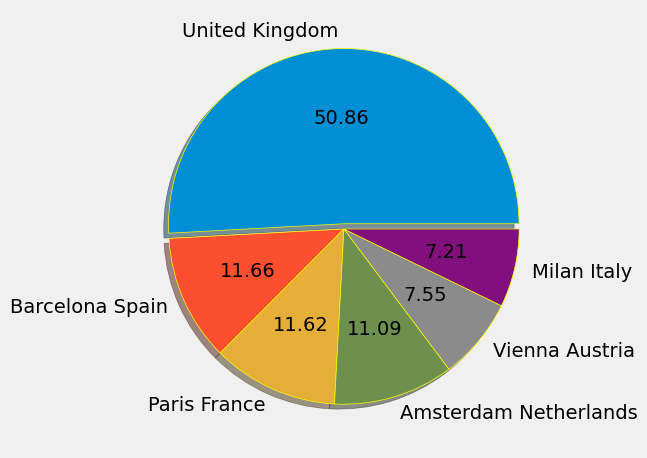

In [27]:
# previous data
grp_country=r_file.groupby('Country').size().reset_index().sort_values(by=0, ascending=False)
grp_country.columns=['Country_Names', 'Total_visits']
#_________________________________________________________
tot_vst=np.array(grp_country['Total_visits']).flatten() # Total visits in array formate
tit_ctry=np.array(grp_country['Country_Names']).flatten() # title of countries being visited in array formate

plt.style.use('fivethirtyeight')
expl=[0.03,0,0,0,0,0]
plt.pie(tot_vst, labels=tit_ctry, explode=expl, autopct="%1.2f",wedgeprops={'edgecolor':'Yellow'}, shadow=True)
plt.tight_layout()
plt.show()


### Result: ----> From above information it can be seen that the most of the people visit UK 


##### To know the names of hotels

In [ ]:
# unique hotels
r_file['Hotel_Name'].unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel', ...,
       'The Berkeley', 'Holiday Inn London Kensington',
       'Atlantis Hotel Vienna'], dtype=object)

In [47]:
# r_file.duplicated(subset=['Total_Reviews']).sum()
# r_file.duplicated(subset=['Average_Score']).sum()
# r_file.duplicated(subset=['Additional_Score']).sum()

#### Since all of these columns almost contain same data there we should neglect them

##### Viewer nationality and reviewer score visualization

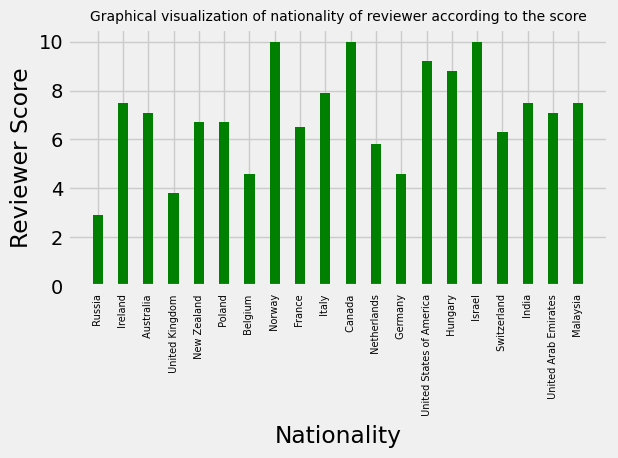

In [68]:
from turtle import color


nation=np.array(r_file['Reviewer_Nationality'].drop_duplicates().head(20)).flatten()

rev_scr=np.array(r_file['Reviewer_Score'].head(20)).flatten()


plt.style.use('fivethirtyeight')
plt.bar(nation, rev_scr, color='g', width=0.4)
plt.title('Graphical visualization of nationality of reviewer according to the score', fontdict={'fontsize':10})
plt.xlabel('Nationality')
plt.ylabel('Reviewer Score')
plt.xticks(fontsize=7, ha='center', rotation=90)
plt.tight_layout()
plt.show()

